In [1]:

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import easyocr
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from PIL import Image
from IPython.display import clear_output 
path_PT_1 = 'Vison_data/pattern_1'
path_PT_2 = 'Vison_data/pattern_2/pattern_2'
path_PT_ALL = 'originVision_All'
path_new_PT_1 = 'newData/new_pattern_1'
path_new_PT_2 = 'newData/new_pattern_2'



import numpy as np
import imutils

'ready'

Path_Nomal_Pattern_1  = 'Nomal\pattern_1'
Path_Nomal_Pattern_2  = 'Nomal\pattern_2'
Path_labels = 'lables'


file_PT1 = os.listdir(Path_Nomal_Pattern_1)
file_PT1 = np.array(file_PT1)[[i[-4:]=='.jpg' for i in file_PT1]]
file_PT2 = os.listdir(Path_Nomal_Pattern_2)
file_PT2 = np.array(file_PT2)[[i[-4:]=='.jpg' for i in file_PT2]]
file_PT_All = os.listdir(path_PT_ALL)
file_PT_All = np.array(file_PT_All)[[i[-4:]=='.jpg' for i in file_PT_All]]

file_labels = os.listdir(Path_labels)



imgs_PT1 = [cv2.imread(os.path.join(Path_Nomal_Pattern_1,i)) for i in file_PT1]
imgs_PT2 = [cv2.imread(os.path.join(Path_Nomal_Pattern_2,i)) for i in file_PT2]
# imgs_PT_All = [cv2.imread(os.path.join(path_PT_ALL,i)) for i in file_PT_All]
labels = {}
imgs_PT_All = {}




for i in file_labels:
    file = open(os.path.join(Path_labels,i), "r")
    strings = file.readlines()
    strings = list(map(lambda s: s.strip(), strings))
    labels[i] = strings
    file.close()

for i in file_PT_All:
    imgs_PT_All[i] = cv2.imread(os.path.join(path_PT_ALL,i))


    


    

C:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


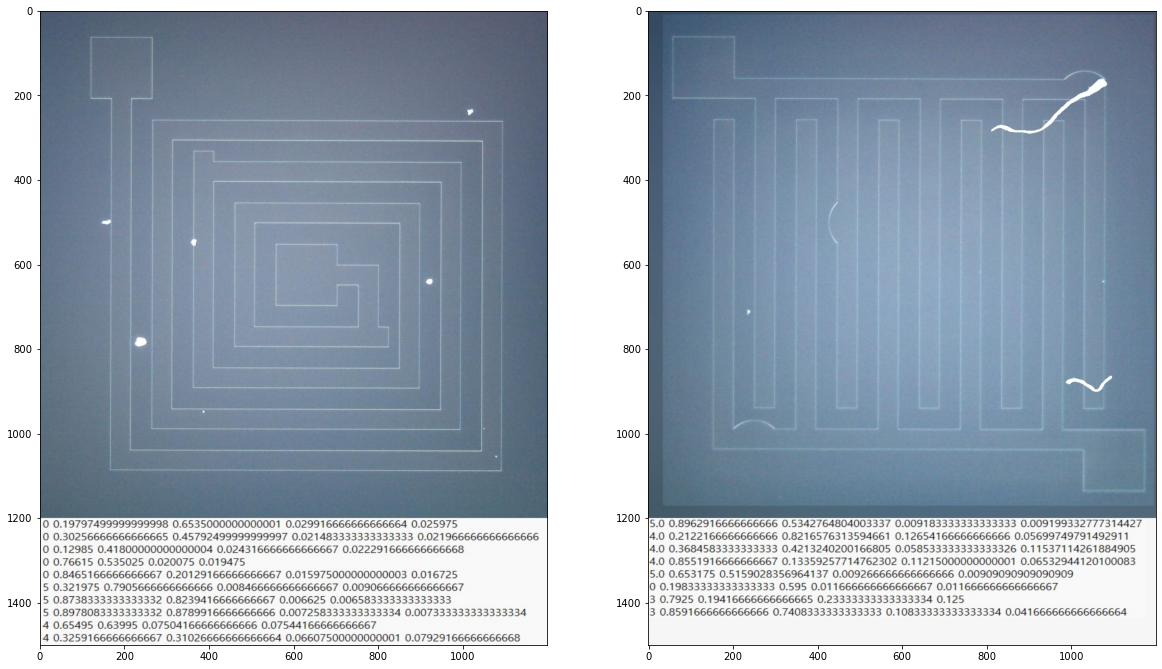

True

In [188]:
label_ori = cv2.imread(os.path.join('temp','label_ori.jpg'))
label_inc = cv2.imread(os.path.join('temp','label_inc.jpg'))
label_canvas = np.ones_like(label_ori) *246
label_canvas[:167,:718,:] = label_inc

f_label_ori = cv2.resize(label_ori,(1200,300))
f_label_inc = cv2.resize(label_canvas,(1200,300))

ori = cv2.imread(os.path.join('temp','ori.jpg'))
inc = cv2.imread(os.path.join('temp','inc.jpg'))


f_ori = cv2.vconcat([ori,f_label_ori])
f_inc = cv2.vconcat([inc,f_label_inc])


f,ax = plt.subplots(1,2)
f.set_size_inches(20,20)




ax[0].imshow(cv2.cvtColor(f_ori,cv2.COLOR_RGB2BGR))
ax[1].imshow(cv2.cvtColor(f_inc,cv2.COLOR_RGB2BGR))
plt.show()

# cv2.imwrite(os.path.join('temp','f_ori.jpg'),f_ori)
# cv2.imwrite(os.path.join('temp','f_inc.jpg'),f_inc)


# cv2.imwrite(os.path.join('ex_error','short.jpg'),img_f)

(1200, 1200, 3)


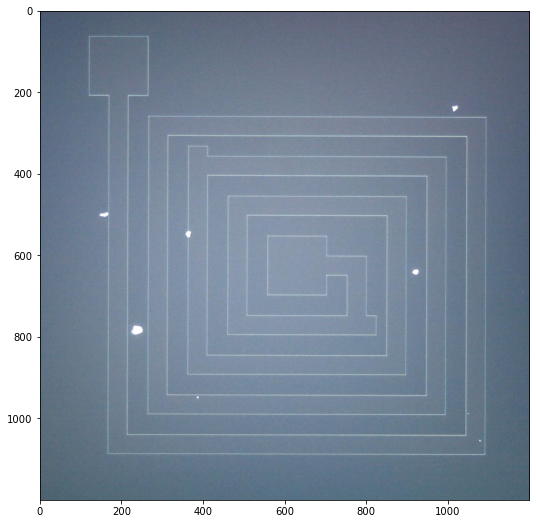

(1200, 1200, 3)


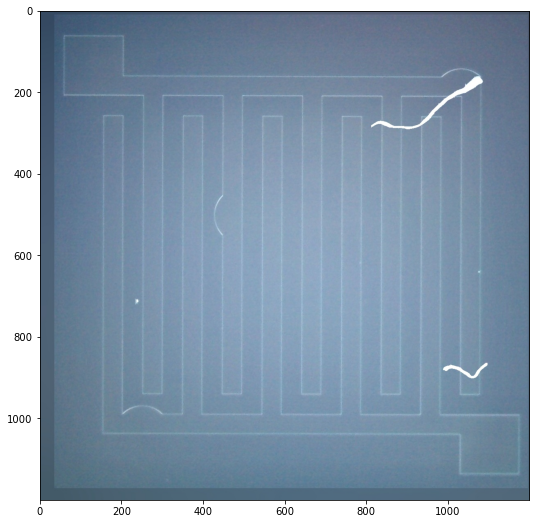

In [183]:

print(ori.shape)
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(ori,cv2.COLOR_RGB2BGR))
plt.show()
print(inc.shape)
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(inc,cv2.COLOR_RGB2BGR))
plt.show()


In [178]:
label_ori[30,700]

array([236, 255, 246], dtype=uint8)

(211, 732, 3)


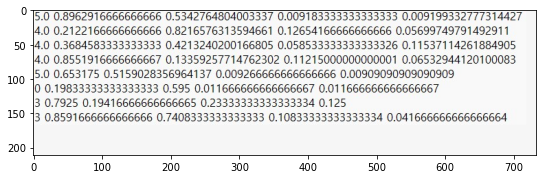

(1199, 1200, 3)

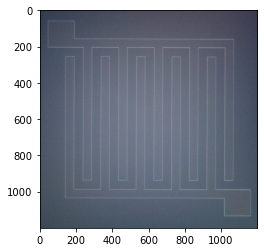

In [88]:
plt.imshow(cv2.cvtColor(imgs_PT_All['pattern_1-1-1-1-D.jpg'],cv2.COLOR_RGB2BGR))

In [55]:
file_labels[  'pattern_1-1-2-12-D' in file_labels]

# for i in file_labels[90:100]:
#     print(i)

'p1_0_jpg.rf.188f4a50c4e1af0e7a4b2d132886af3f.txt'

In [54]:
for i in file_labels[90:100]:
    if 'pattern_1-1-2-12-D' in i:
        print(i)

pattern_1-1-2-12-D_jpg.rf.662f4bb4cf1389c0ea55ac6e89e2494d.txt


In [43]:
file_labels[False]

'p1_0_jpg.rf.188f4a50c4e1af0e7a4b2d132886af3f.txt'

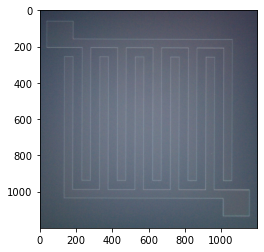

In [37]:
plt.imshow(cv2.cvtColor(imgs_PT1[0],cv2.COLOR_RGB2BGR))

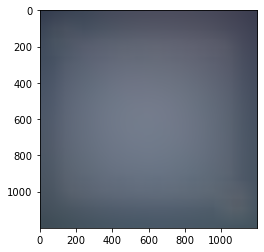

In [47]:
testimg = imgs_PT1[0]

testimg_B = cv2.blur(testimg,(99,99),99)

plt.imshow(cv2.cvtColor(testimg_B,cv2.COLOR_RGB2BGR))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


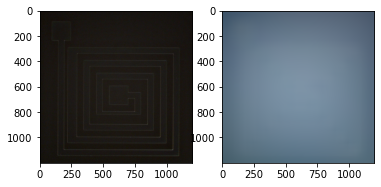

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


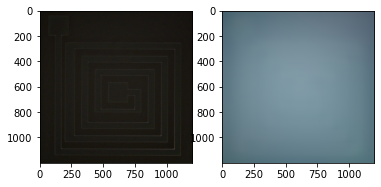

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


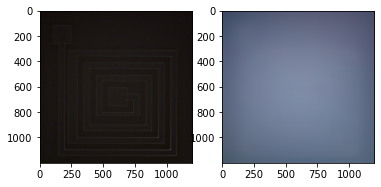

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


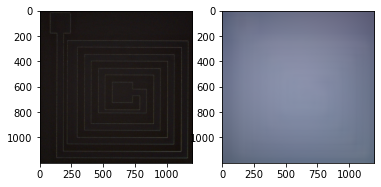

In [47]:
#배경과 회로 분리



Path_T = "dataset/circuit_2/error/circuit_2_width"

file_PTT = os.listdir(Path_T)
file_PTT = np.array(file_PTT)[[i[-4:]=='.jpg' for i in file_PTT]]
imgs_PTT = [cv2.imread(os.path.join(Path_T,i)) for i in file_PTT]

li_back = []
li_circuit = []


for i,v in enumerate(file_PTT):
    
    imgT = cv2.imread(os.path.join(Path_T,v))
    testimg = cv2.resize(imgT.copy(),(1200,1200))
    testimg_B = cv2.blur(testimg,(99,99),99)
    tt =  (testimg - (testimg_B *0.8)).astype(int)
    
    txt = getLables(v[:-4])
    
    f = open(os.path.join(Path_T,f'{v[:-4]}.txt'),'w')
    f.write('\n'.join(np.array(txt).astype(str)))
    f.close()
    
    li_back.append(cv2.cvtColor(testimg_B,cv2.COLOR_BGR2RGB))
    li_circuit.append(tt)
    f,ax = plt.subplots(1,2)
    cv2.imwrite(os.path.join(Path_T,'B_'+v),tt)
    ax[0].imshow(tt)
    ax[1].imshow(cv2.cvtColor(testimg_B,cv2.COLOR_BGR2RGB))
    plt.show()

In [42]:
f.close()

In [591]:
print('\n'.join(getLables('pattern_1-1-2-2-D')))

1 0.18542499999999998 0.37535833333333335 0.026583333333333334 0.028358333333333333
1 0.18584166666666666 0.807025 0.03575833333333333 0.0392
1 0.8326333333333333 0.20853333333333335 0.03476666666666667 0.03836666666666667
5 0.7328166666666667 0.20829166666666665 0.007425 0.005908333333333333


In [4]:
# 배경회로 결합 테스트


# b1 = li_back[4]
# c1 = li_circuit[1]

# f1 = b1+c1

# # print(f1[:,0])
# # print('\n\n')
# # print(b1[:,0])
# # print('\n\n')
# # print(c1[:,0])


# plt.imshow(f1)


In [36]:
for i,v in enumerate(li_back):
    cv2.imwrite(os.path.join('dataset/background',f'{i+10}.jpg'),cv2.cvtColor(v,cv2.COLOR_BGR2RGB))

In [585]:
def getImage(fname):
    r = ''
    fn = fname[:fname.index('_jpg')]
    for i in imgs_PT_All.keys():
        if (fn+'.') in i:
            return imgs_PT_All[i]
def getLables(fname):
    for i in labels:
        if fname in i:
            return labels[i]
  

## 오류이미지 정리
    로보플로를 통해서 생성된 레이블값으로 오류 읽어오기
    오류가 발생한 부분만 자르기.
    자른 사진을 유형에 따라 폴더별로 정리하기

In [21]:
# 오류 읽어오기
Path_labels = 'lables'
file_labels = os.listdir(Path_labels)
for i in file_labels:
    file = open(os.path.join(Path_labels,i), "r")
    strings = file.readlines()
    strings = list(map(lambda s: s.strip(), strings))
    labels[i] = strings
    file.close()

In [264]:
# 라벨링된 좌표를 통하여서 오류별로 다른 폴더에 이미지로 저장

for i,ImgName in enumerate(labels.keys()):
    
    
    print(f'{i}/{len(labels.keys())}')
    clear_output(wait=True)
    

    la = [list(map(np.float64, i.split(' ')))for i in labels[ImgName]]
    ia = getImage(ImgName)
    testimg = ia.copy()
    testimg = testimg.astype(np.int16)

    testimg_B = cv2.blur(testimg,(99,99),99)
    tt =  (testimg - (testimg_B)).astype(int)
    tt[tt<0] = 0
    tt = tt.astype(np.uint8)
    
    for box in la:
        xm = int(ia.shape[1] * box[1]) - int((ia.shape[1] * box[3])/2)
        ym = int(ia.shape[0] * box[2]) - int((ia.shape[0] * box[4])/2)
        xM = int(ia.shape[1] * box[1]) + int((ia.shape[1] * box[3])/2)
        yM = int(ia.shape[0] * box[2]) + int((ia.shape[0] * box[4])/2)
        tempPath = os.path.join('Error',str(int(box[0])))
        newName = len(os.listdir(tempPath))
        cv2.imwrite(os.path.join(tempPath,f'{newName}.jpg'),tt[ym:yM,xm:xM])

clear_output(wait=True)
print('finish')
        


304/305


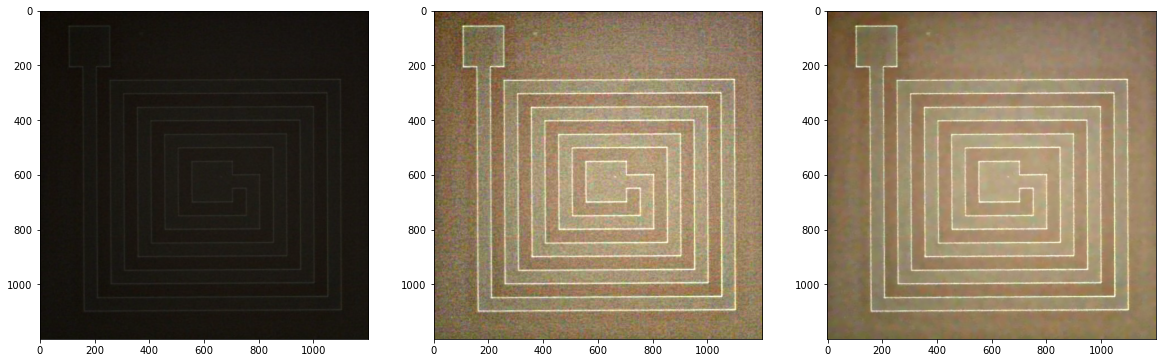

In [290]:


f,ax = plt.subplots(1,3)
f.set_size_inches(20,20)
ax[0].imshow(li_circuit[0])
ax[1].imshow(xxx)


xxx = li_circuit[0].copy()

for i in range(5):
    xxx = SumImg(xxx,li_circuit[0])

ax[2].imshow(cv2.bilateralFilter(xxx,-1,51,9))

# ax[1].imshow(cv2.cvtColor(li_circuit[1],cv2.COLOR_BGR2RGB))


## 데이터 증식

In [10]:


dic_ErrorCode = {}

# 배경
path_backGround = "dataset/background"
img_backGround = [cv2.imread(os.path.join(path_backGround,i)) for i in os.listdir(path_backGround)]

# 오류들
path_Error_sPoint = "dataset/error/s_point"
path_Error_bPoint = "dataset/error/b_point"
path_Error_scratch = "dataset/error/scratch"
path_Error_foreign = "dataset/error/foreign"

img_Error_sPoint = [cv2.imread(os.path.join(path_Error_sPoint,i)) for i in os.listdir(path_Error_sPoint)]
img_Error_bPoint = [cv2.imread(os.path.join(path_Error_bPoint,i)) for i in os.listdir(path_Error_bPoint)]
img_Error_scratch = [cv2.imread(os.path.join(path_Error_scratch,i)) for i in os.listdir(path_Error_scratch)]
img_Error_foreign = [cv2.imread(os.path.join(path_Error_foreign,i)) for i in os.listdir(path_Error_foreign)]


# 회로에서 , 혹은 회로근처 고정된 위치에서 벌어지는 에러들
path_Error_Circuit1_circle = "dataset/circuit_1/error/circuit_1_circle"
path_Error_Circuit1_cut = "dataset/circuit_1/error/circuit_1_cut"
path_Error_Circuit1_project = "dataset/circuit_1/error/circuit_1_project"
path_Error_Circuit1_short = "dataset/circuit_1/error/circuit_1_short"
path_Error_Circuit1_width = "dataset/circuit_1/error/circuit_1_width"
path_Error_Circuit2_circle = "dataset/circuit_2/error/circuit_2_circle"
path_Error_Circuit2_cut = "dataset/circuit_2/error/circuit_2_cut"
path_Error_Circuit2_project = "dataset/circuit_2/error/circuit_2_project"
path_Error_Circuit2_width = "dataset/circuit_2/error/circuit_2_width"

img_Error_Circuit1_circle = [cv2.imread(os.path.join(path_Error_Circuit1_circle,i)) for i in os.listdir(path_Error_Circuit1_circle)]
img_Error_Circuit1_cut = [cv2.imread(os.path.join(path_Error_Circuit1_cut,i)) for i in os.listdir(path_Error_Circuit1_cut)]
img_Error_Circuit1_project = [cv2.imread(os.path.join(path_Error_Circuit1_project,i)) for i in os.listdir(path_Error_Circuit1_project)]
img_Error_Circuit1_short = [cv2.imread(os.path.join(path_Error_Circuit1_short,i)) for i in os.listdir(path_Error_Circuit1_short)]
img_Error_Circuit1_width = [cv2.imread(os.path.join(path_Error_Circuit1_width,i)) for i in os.listdir(path_Error_Circuit1_width)]
img_Error_Circuit2_circle = [cv2.imread(os.path.join(path_Error_Circuit2_circle,i)) for i in os.listdir(path_Error_Circuit2_circle)]
img_Error_Circuit2_cut = [cv2.imread(os.path.join(path_Error_Circuit2_cut,i)) for i in os.listdir(path_Error_Circuit2_cut)]
img_Error_Circuit2_project = [cv2.imread(os.path.join(path_Error_Circuit2_project,i)) for i in os.listdir(path_Error_Circuit2_project)]
img_Error_Circuit2_width = [cv2.imread(os.path.join(path_Error_Circuit2_width,i)) for i in os.listdir(path_Error_Circuit2_width)]


# 정상데이터
path_nomal_Circuit1 = "dataset/circuit_1/nomal"
path_nomal_Circuit2 = "dataset/circuit_2/nomal"
img_nomal_Circuit1 = [cv2.imread(os.path.join(path_nomal_Circuit1,i)) for i in os.listdir(path_nomal_Circuit1)]
img_nomal_Circuit2 = [cv2.imread(os.path.join(path_nomal_Circuit2,i)) for i in os.listdir(path_nomal_Circuit2)]





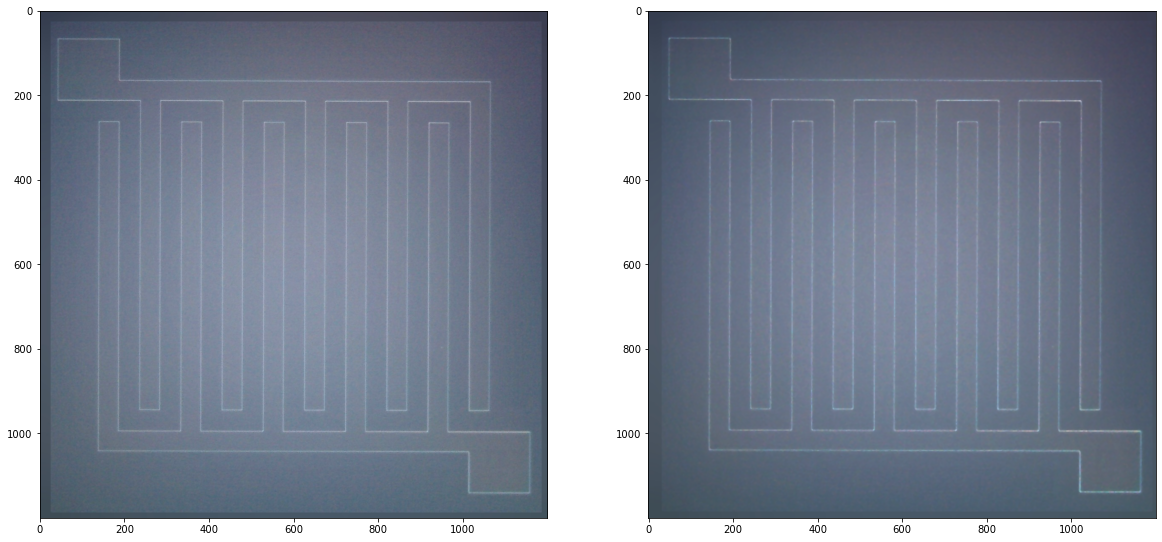

In [71]:
f,ax = plt.subplots(1,2)
f.set_size_inches(20,20)


fin,_ = randomSumImg(back,a_f[20:-20,20:-20])
fin_A,_ = randomSumImg(back,a[20:-20,20:-20])
fin = cv2.medianBlur(fin,5)
ax[0].imshow(cv2.cvtColor(fin_A,cv2.COLOR_RGB2BGR))
ax[1].imshow(cv2.cvtColor(fin,cv2.COLOR_RGB2BGR))

In [73]:
def SumImg(img_1,img_2):
    img_r = cv2.resize(img_2,(img_1.shape[1],img_1.shape[0]))
    result = img_1.astype(np.int16) + img_r
    result[255<result] = 255
    return result.astype(np.uint8)


def SumImg_2(img1,img2):
    a_s = img2.copy()
    a_s = a_s.astype(np.float64)
    a_s = a_s * a_s
    wx = np.max(a_s.reshape(-1))/255
    a_s = a_s/wx
    a_s =a_s.astype(np.uint8)

    a_g = cv2.cvtColor(a_s,cv2.COLOR_RGB2GRAY)
    _,a_b = cv2.threshold(a_g,25,255,cv2.THRESH_BINARY)
    a_f = a_s.copy()
    a_f[a_s == False] = 0

    img_result,_ = randomSumImg(img1,a_f[20:-20,20:-20])
    img_result = cv2.medianBlur(img_result,5)
    
    return img_result


def randomImg(path):
    fileList = os.listdir(path)
    fileList = np.array(fileList)[[i[-4:] == '.jpg' for i in fileList]]
    file =  np.random.choice(fileList)
    img = cv2.imread(os.path.join(path,file))
    return img

def randomSumImg(img_1,img_2):
    img_result = img_1.copy()
    x_new = img_1.shape[1] - img_2.shape[1]
    y_new = img_1.shape[0] - img_2.shape[0]
    x_ObjCenter =  np.random.randint(x_new)
    y_ObjCenter =  np.random.randint(y_new)
    
    xm = x_ObjCenter
    xM = x_ObjCenter + img_2.shape[0]
    ym = y_ObjCenter
    yM = y_ObjCenter + img_2.shape[1]
    
    img_sum = img_1[ xm:xM , ym:yM]
    img_sum = SumImg(img_sum,img_2)
    img_result[ xm:xM , ym:yM] = img_sum

    # 상대좌표 반환
    return img_result, ( int(ym + img_sum.shape[1]/2) / img_1.shape[1],int(xm + img_sum.shape[0]/2)   / img_1.shape[0], 
                        img_sum.shape[1] / img_1.shape[1],img_sum.shape[0] / img_1.shape[0] )
    

#     실제 좌표(절대좌표)를 반환
#     return img_result, ( int(ym + img_sum.shape[1]/2),int(xm + img_sum.shape[0]/2)  , img_sum.shape[1],img_sum.shape[0] )


def randomSumImg_absolute(img_1,img_2):
    img_result = img_1.copy()
    x_new = img_1.shape[1] - img_2.shape[1]
    y_new = img_1.shape[0] - img_2.shape[0]
    x_ObjCenter =  np.random.randint(x_new)
    y_ObjCenter =  np.random.randint(y_new)
    
    xm = x_ObjCenter
    xM = x_ObjCenter + img_2.shape[0]
    ym = y_ObjCenter
    yM = y_ObjCenter + img_2.shape[1]
    
    img_sum = img_1[ xm:xM , ym:yM]
    img_sum = SumImg(img_sum,img_2)
    img_result[ xm:xM , ym:yM] = img_sum

    #실제 좌표(절대좌표)를 반환
    return img_result, ( int(ym + img_sum.shape[1]/2),int(xm + img_sum.shape[0]/2)  , img_sum.shape[1],img_sum.shape[0] )



(0.5158333333333334, 0.5016666666666667, 0.9666666666666667, 0.9666666666666667)


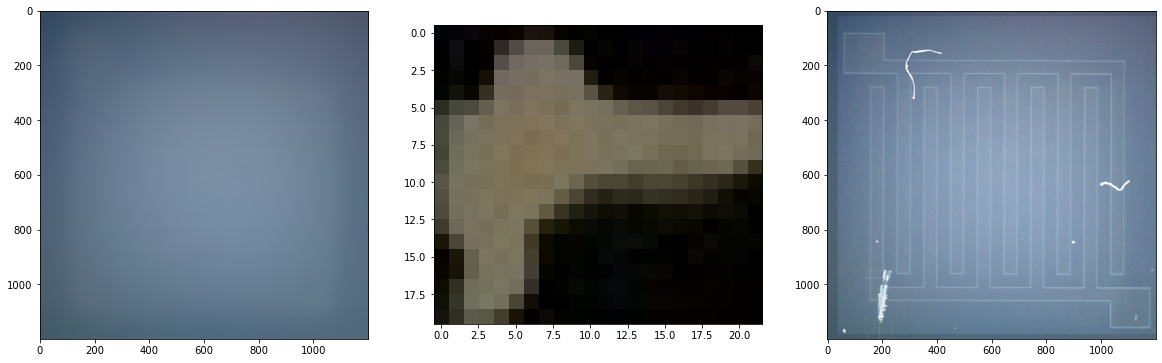

In [358]:
x = randomImg(path_backGround)

xxx , tx = randomSumImg(x,randomImg(path_Error_bPoint))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_bPoint))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_bPoint))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_bPoint))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_foreign))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_foreign))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_sPoint))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_sPoint))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_scratch))
xxx , tx = randomSumImg(xxx,randomImg(path_Error_scratch))
xxx , tx = randomSumImg(xxx,randomImg(path_nomal_Circuit1)[20:-20,20:-20])







# xxx, tx

xxxd = xxx.copy()
# xxxd = cv2.rectangle(xxxd,(int(tx[0]-tx[2]/2),int(tx[1]-tx[3]/2)),(int(tx[0]+tx[2]/2),int(tx[1]+tx[3]/2)),(0,200,200),3)


f,ax = plt.subplots(1,3)
f.set_size_inches(20,20)
ax[0].imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(xx,cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(xxx,cv2.COLOR_BGR2RGB))
print(tx)

In [74]:
def makeDummy_Circuit_1():
    
    
    
    
    per_Circuit_Error = -1 # 회로오류 발생확률
    per_sPoint_Error = -1  # s_Point 오류 발생확률
    per_bPoint_Error = -1  # b_Point 오류 발생확률
    per_scratch_Error = -1 # 스크레치 오류 발생확률
    per_foreign_Error = -1 # 이물질 오류 발생확률
    
    # 각오류가 발생한 이미지에서 관측가능한 최대갯수
    sPoint_Error_Max = 20
    bPoint_Error_Max = 10
    scratch_Error_Max = 5
    foreign_Error_Max = 3
    
    # 회로오류 유형
    Circuit_Error = [path_Error_Circuit1_circle,path_Error_Circuit1_cut,path_Error_Circuit1_project,path_Error_Circuit1_short,path_Error_Circuit1_width]
    
    img_result = randomImg(path_backGround)
    temp_label = ''
    
    
    # 확률에 따른 회로오류 발생 구간
    if np.random.rand() <= per_Circuit_Error:
        temp_error_class = np.random.choice(Circuit_Error)
        temp_error_fileList = os.listdir(temp_error_class)
        temp_error_fileList = np.array(temp_error_fileList)[[i[-4:] == '.jpg' for i in temp_error_fileList]]
        temp_error_file =  np.random.choice(temp_error_fileList)
        img_result,la = randomSumImg(img_result,cv2.imread(os.path.join(temp_error_class,temp_error_file))[20:-20,20:-20])
        la = np.array(la[:2])
        la -= 0.5
#         la[0] -= 0.5
#         la[1] -= 0.5
#         la = la * img_result.shape[0]
#        la_t = '보정좌표 ' + ' '.join(np.array(la).astype(str)) + '\n'
#        temp_label += la_t
        
        basic_label = getLables(temp_error_file[:-4])
        for bl in basic_label:
            tla = np.array(bl.split(' ')).astype(np.float64)
            tla[1] += la[0]
            tla[2] += la[1]
            temp_label += ' '.join(tla.astype(str)) +'\n'
            
#        temp_label += '\n\n\n'
    
        
    else :
        img_result,_ = randomSumImg(img_result,randomImg(path_nomal_Circuit1)[20:-20,20:-20])
   
    #s_point 오류 발생구간
    if np.random.rand() <= per_sPoint_Error:
        for _ in range(np.random.randint(1,sPoint_Error_Max)):
            img_result, la = randomSumImg(img_result,randomImg(path_Error_sPoint))
            la_t = '5 ' + ' '.join(np.array(la).astype(str)) + '\n'
            temp_label += la_t
            
    if np.random.rand() <= per_bPoint_Error:
        for _ in range(np.random.randint(1,bPoint_Error_Max)):
            img_result, la = randomSumImg(img_result,randomImg(path_Error_bPoint))
            la_t = '0 ' + ' '.join(np.array(la).astype(str)) + '\n'
            temp_label += la_t
            
    if np.random.rand() <= per_scratch_Error:
        for _ in range(np.random.randint(1,scratch_Error_Max)):
            img_result, la = randomSumImg(img_result,randomImg(path_Error_scratch))
            la_t = '6 ' + ' '.join(np.array(la).astype(str)) + '\n'
            temp_label += la_t
            
    if np.random.rand() <= per_foreign_Error:
        for _ in range(np.random.randint(1,foreign_Error_Max)):
            img_result, la = randomSumImg(img_result,randomImg(path_Error_foreign))
            la_t = '3 ' + ' '.join(np.array(la).astype(str)) + '\n'
            temp_label += la_t
    
    
    return  img_result, temp_label

In [76]:
def makeDummy_Circuit_2():
    
    
    
    per_Circuit_Error = -1 # 회로오류 발생확률
    per_sPoint_Error = -1  # s_Point 오류 발생확률
    per_bPoint_Error = -1  # b_Point 오류 발생확률
    per_scratch_Error = -1 # 스크레치 오류 발생확률
    per_foreign_Error = -1 # 이물질 오류 발생확률
    
    # 각오류가 발생한 이미지에서 관측가능한 최대갯수
    sPoint_Error_Max = 20
    bPoint_Error_Max = 10
    scratch_Error_Max = 5
    foreign_Error_Max = 3
    
    # 회로오류 유형
    Circuit_Error = [path_Error_Circuit2_circle,path_Error_Circuit2_cut,path_Error_Circuit2_project,path_Error_Circuit2_width]
    
    img_result = randomImg(path_backGround)
    temp_label = ''
    
    
    # 확률에 따른 회로오류 발생 구간
    if np.random.rand() <= per_Circuit_Error:
        temp_error_class = np.random.choice(Circuit_Error)
        temp_error_fileList = os.listdir(temp_error_class)
        temp_error_fileList = np.array(temp_error_fileList)[[i[-4:] == '.jpg' for i in temp_error_fileList]]
        temp_error_file =  np.random.choice(temp_error_fileList)
        img_result,la = randomSumImg(img_result,cv2.imread(os.path.join(temp_error_class,temp_error_file))[20:-20,20:-20])
        la = np.array(la[:2])
        la -= 0.5
#         la[0] -= 0.5
#         la[1] -= 0.5
#         la = la * img_result.shape[0]
#        la_t = '보정좌표 ' + ' '.join(np.array(la).astype(str)) + '\n'
#        temp_label += la_t
        
        basic_label = getLables(temp_error_file[:-4])
        for bl in basic_label:
            tla = np.array(bl.split(' ')).astype(np.float64)
            tla[1] += la[0]
            tla[2] += la[1]
            temp_label += ' '.join(tla.astype(str)) +'\n'
            
#        temp_label += '\n\n\n'
    
        
    else :
        img_result,_ = randomSumImg(img_result,randomImg(path_nomal_Circuit2)[20:-20,20:-20])
   
    #s_point 오류 발생구간
    if np.random.rand() <= per_sPoint_Error:
        for _ in range(np.random.randint(1,sPoint_Error_Max)):
            img_result, la = randomSumImg(img_result,randomImg(path_Error_sPoint))
            la_t = '5 ' + ' '.join(np.array(la).astype(str)) + '\n'
            temp_label += la_t
            
    if np.random.rand() <= per_bPoint_Error:
        for _ in range(np.random.randint(1,bPoint_Error_Max)):
            img_result, la = randomSumImg(img_result,randomImg(path_Error_bPoint))
            la_t = '0 ' + ' '.join(np.array(la).astype(str)) + '\n'
            temp_label += la_t
            
    if np.random.rand() <= per_scratch_Error:
        for _ in range(np.random.randint(1,scratch_Error_Max)):
            img_result, la = randomSumImg(img_result,randomImg(path_Error_scratch))
            la_t = '6 ' + ' '.join(np.array(la).astype(str)) + '\n'
            temp_label += la_t
            
    if np.random.rand() <= per_foreign_Error:
        for _ in range(np.random.randint(1,foreign_Error_Max)):
            img_result, la = randomSumImg(img_result,randomImg(path_Error_foreign))
            la_t = '3 ' + ' '.join(np.array(la).astype(str)) + '\n'
            temp_label += la_t
    
    
    return  img_result, temp_label

In [754]:
path_increase_data_img = 'increase_data_train_3000/images'
path_increase_data_lab = 'increase_data_train_3000/lables'


count = 50



for i in range(count):
    print(f'{i} / {count}')
    fn = f'increase_Circuit1_t3000_{i}'
    img,label =  makeDummy_Circuit_1()   
    cv2.imwrite(os.path.join(path_increase_data_img,f'{fn}.jpg'),img)
    f = open(os.path.join(path_increase_data_lab,f'{fn}.txt'),'w')

    f.write(label)
    f.close()
    
    
    fn = f'increase_Circuit2_t3000_{i}'
    img_2,label_2 =  makeDummy_Circuit_2()   
    cv2.imwrite(os.path.join(path_increase_data_img,f'{fn}.jpg'),img_2)
    f = open(os.path.join(path_increase_data_lab,f'{fn}.txt'),'w')

    f.write(label_2)
    f.close()
    clear_output(wait=True)



1499 / 1500


In [78]:
path_increase_data_img = 'increase_data_nomal'






count = 50



for i in range(count):
    print(f'{i} / {count}')
    fn = f'increase_Circuit1_nomal_{i}'
    img,label =  makeDummy_Circuit_1()   
    cv2.imwrite(os.path.join(path_increase_data_img,f'{fn}.jpg'),img)  
    fn = f'increase_Circuit2_nomal_{i}'
    img_2,label_2 =  makeDummy_Circuit_2()   
    cv2.imwrite(os.path.join(path_increase_data_img,f'{fn}.jpg'),img_2)
    clear_output(wait=True)
 

49 / 50


In [677]:
print(label)

5 0.6233333333333333 0.02666666666666667 0.008333333333333333 0.008333333333333333
5 0.0725 0.38916666666666666 0.008333333333333333 0.008333333333333333
5 0.6041666666666666 0.6758333333333333 0.013333333333333334 0.015
5 0.8025 0.36 0.013333333333333334 0.025
5 0.15 0.9241666666666667 0.016666666666666666 0.015
5 0.4266666666666667 0.6433333333333333 0.008333333333333333 0.008333333333333333
5 0.7933333333333333 0.435 0.015 0.013333333333333334
5 0.7725 0.14916666666666667 0.008333333333333333 0.008333333333333333
5 0.034166666666666665 0.8125 0.006666666666666667 0.01
5 0.9516666666666667 0.5741666666666667 0.006666666666666667 0.006666666666666667
5 0.2775 0.03333333333333333 0.015 0.013333333333333334
5 0.36333333333333334 0.5508333333333333 0.008333333333333333 0.008333333333333333
5 0.37 0.8783333333333333 0.006666666666666667 0.008333333333333333
5 0.9591666666666666 0.18166666666666667 0.011666666666666667 0.015
5 0.1225 0.2658333333333333 0.01 0.01
5 0.3908333333333333 0.2966

In [675]:
txt

['8 0.5372289156626505 0.665885078776645 0.10860982391102873 0.27134383688600555',
 '8 0.21424467099165892 0.5534569045412419 0.2825671918443003 0.7230583873957368']

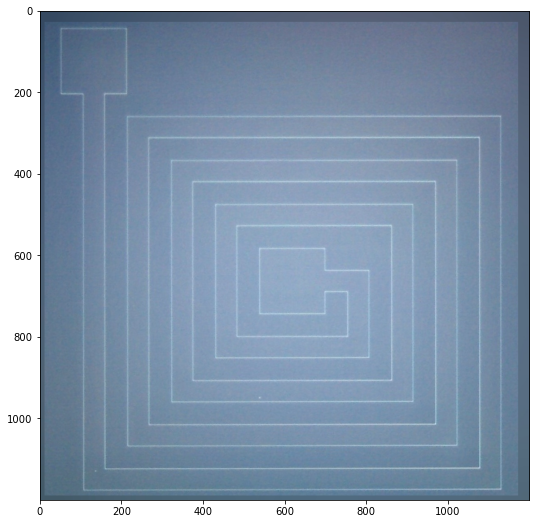

5 0.11333333333333333 0.9408333333333333 0.008333333333333333 0.008333333333333333
5 0.44916666666666666 0.7916666666666666 0.006666666666666667 0.006666666666666667



In [634]:
x,xx = makeDummy_Circuit_2()
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(x,cv2.COLOR_RGB2BGR))
plt.show()
print(xx)

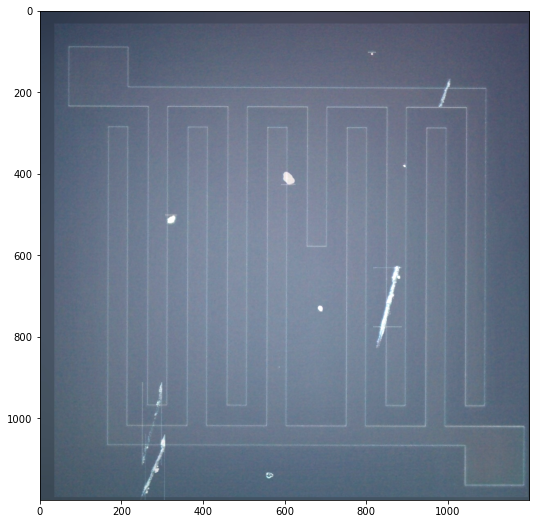

7.0 0.56355 0.5049951348345845 0.15110833333333334 0.724211843202669
0 0.5716666666666667 0.6091666666666666 0.011666666666666667 0.015
0 0.7416666666666667 0.3175 0.013333333333333334 0.011666666666666667
0 0.5066666666666667 0.3441666666666667 0.03 0.03166666666666667
0 0.4683333333333333 0.9491666666666667 0.016666666666666666 0.013333333333333334
0 0.6775 0.08916666666666667 0.016666666666666666 0.015
0 0.2675 0.4275 0.025 0.023333333333333334
6 0.8266666666666667 0.16833333333333333 0.028333333333333332 0.058333333333333334
6 0.23 0.9325 0.051666666666666666 0.13416666666666666
6 0.7091666666666666 0.6058333333333333 0.058333333333333334 0.16833333333333333
6 0.22666666666666666 0.8441666666666666 0.04833333333333333 0.17



In [657]:
x, xx = makeDummy_Circuit_1()
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(x,cv2.COLOR_RGB2BGR))
plt.show()
print(xx)

In [508]:
'0 '+' '.join(np.array(xx).astype(str))

'0 0.15583333333333332 0.95 0.011666666666666667 0.011666666666666667'

In [388]:
for i in range(20):
    print(np.random.rand() < 0.3)

False
True
False
False
False
False
False
True
False
False
False
False
False
False
True
True
False
True
False
False


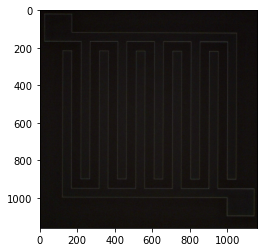

In [102]:
plt.imshow(xx)

In [106]:
print(x.shape)
print(xx.shape)
xxr = cv2.resize(xx, (x.shape[0],x.shape[1]))
print(xxr.shape)

(1200, 1200, 3)
(1160, 1160, 3)
(1200, 1200, 3)


In [702]:
colorTabel = {
    0:(200,0,0),
    1:(0,200,0),
    2:(0,0,200),
    3:(200,200,0),
    4:(200,0,200),
    5:(0,200,200),
    6:(100,200,0),
    7:(0,100,200),
    8:(200,0,100)
}








def drawLabel(img,lables):
    
    img_result = img.copy()
    X = img_result.shape[0]
    Y = img_result.shape[1]
    
    
    for lable in lables:
        la = np.array(lable.split(' ')).astype(np.float64)
        la[[1,3]] = la[[1,3]]*X
        la[[2,4]] = la[[2,4]]*Y
        
        xm = int(la[1] - la[3]/2)
        ym = int(la[2] - la[4]/2)
        xM = int(la[1] + la[3]/2)
        yM = int(la[2] + la[4]/2)
        
        img_result = cv2.rectangle(img_result,(xm,ym),(xM,yM),colorTabel[int(la[0])],3)
        
    return img_result
        

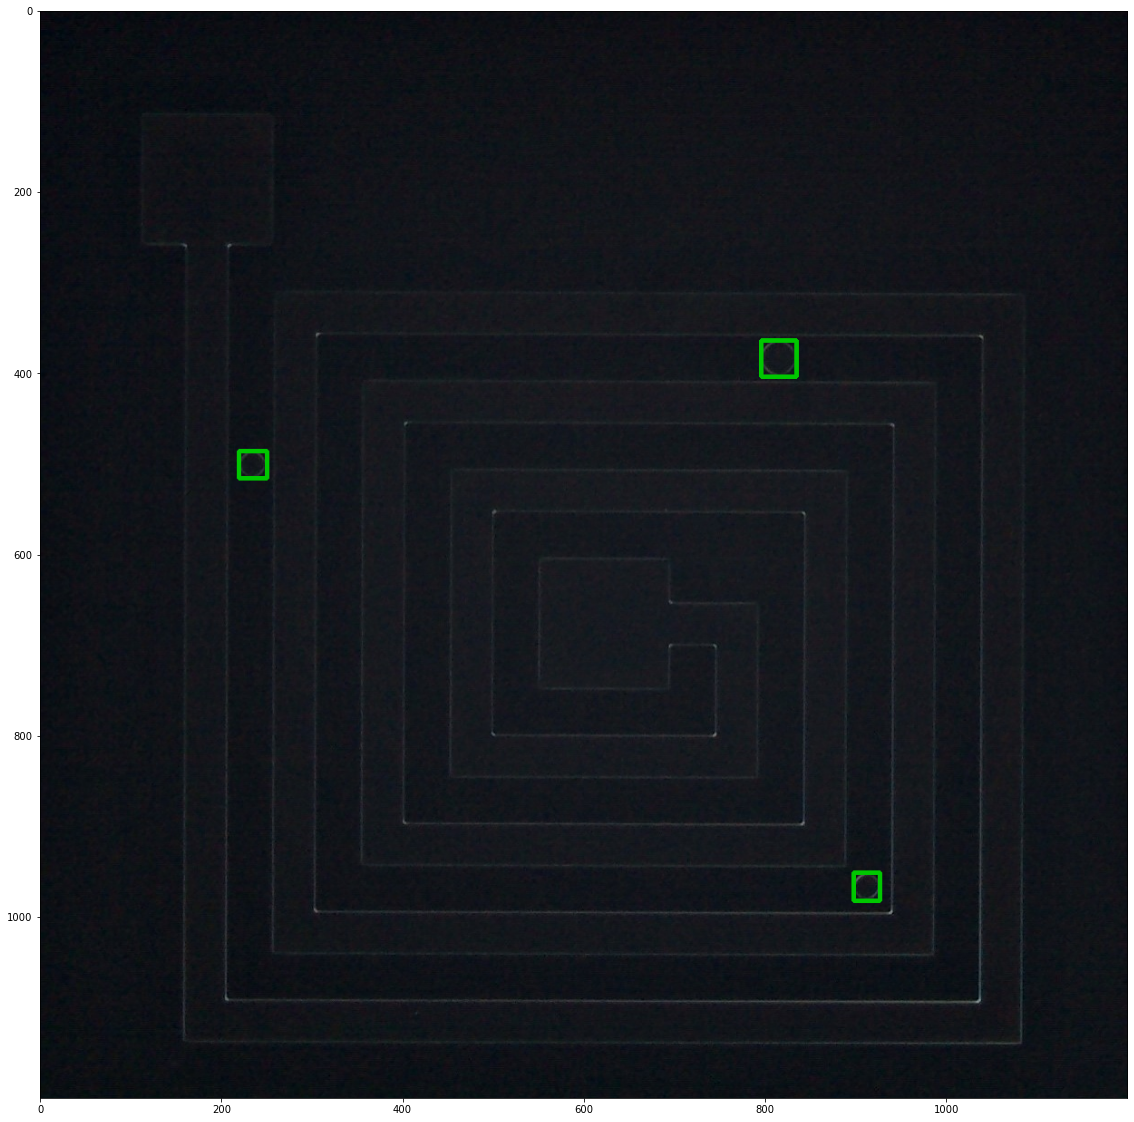

In [752]:
p_img = "dataset/circuit_2/error/circuit_2_circle/pattern_2-1-2-13.jpg"
p_lable ="dataset/circuit_2/error/circuit_2_circle/pattern_2-1-2-13.txt"
img = cv2.imread(p_img)




# plt.figure(figsize=(7,7))
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
# plt.show()
file = open(p_lable, "r")
strings = file.readlines()
strings = list(map(lambda s: s.strip(), strings))
file.close()
# print('\n'.join(strings))

iii =drawLabel(img,strings)
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(iii,cv2.COLOR_RGB2BGR))
plt.show()


In [698]:
for lable in strings:
    la = np.array(lable.split(' ')).astype(np.float64)
 
    xm = int(la[1] - la[3]/2)
    ym = int(la[2] - la[4]/2)
    xM = int(la[1] + la[3]/2)
    yM = int(la[2] + la[4]/2)

In [701]:
colorTabel[int(la[0])]

(200, 0, 0)

In [693]:
np.array(strings[0].split(' ')).astype(np.float64)




array([5.        , 0.96833333, 0.21833333, 0.01      , 0.00833333])